In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
pd.read_csv(r'C:\Users\FINRISE\Desktop\predective_analysis\Fraud detection\carclaims.csv')


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [39]:
df = pd.read_csv(r'C:\Users\FINRISE\Desktop\predective_analysis\Fraud detection\carclaims.csv')


In [40]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [41]:
df.describe(include='all')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,9,2,2,2,4,5,5,NaN,3,2
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision,No
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5593,14992,15333,15179,7047,14324,14316,NaN,5962,14497
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN,NaN


In [42]:
# Replace common null markers with actual NaN
df.replace(['?', 'NA', 'na', 'none', 'None'], pd.NA, inplace=True)



In [43]:
# Drop rows with any missing values
df_cleaned = df.dropna()




In [44]:
# Show dataset shape
print("Original shape:", df.shape)
print("After cleaning:", df_cleaned.shape)

Original shape: (15420, 33)
After cleaning: (6325, 33)


In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 30))

<Figure size 1800x3000 with 0 Axes>

<Figure size 1800x3000 with 0 Axes>

C:\Users\FINRISE\AppData\Local\Temp\ipykernel_9528\462648334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='FraudFound', palette='Set2')


Text(0.5, 1.0, 'Fraud vs Non-Fraud Count')

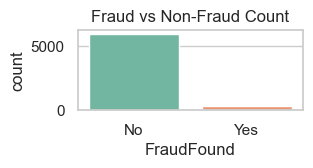

In [46]:
# 1. Fraud vs Non-Fraud
plt.subplot(4, 2, 1)
sns.countplot(data=df_cleaned, x='FraudFound', palette='Set2')
plt.title('Fraud vs Non-Fraud Count')



Text(0.5, 1.0, 'Age Distribution')

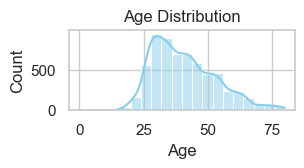

In [47]:
# 2. Age Distribution
plt.subplot(4, 2, 2)
sns.histplot(data=df_cleaned, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Vehicle Category vs Fraud')

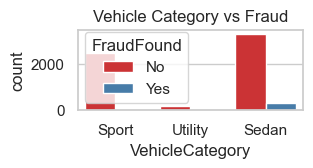

In [48]:
# 3. Vehicle Category vs Fraud
plt.subplot(4, 2, 3)
sns.countplot(data=df_cleaned, x='VehicleCategory', hue='FraudFound', palette='Set1')
plt.title('Vehicle Category vs Fraud')



Text(0.5, 1.0, 'Vehicle Price vs Fraud')

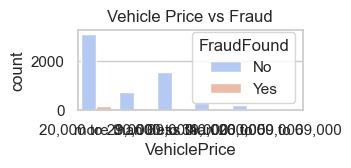

In [49]:
# 4. Vehicle Price vs Fraud
plt.subplot(4, 2, 4)
sns.countplot(data=df_cleaned, x='VehiclePrice', hue='FraudFound', palette='coolwarm')
plt.title('Vehicle Price vs Fraud')



Text(0.5, 1.0, 'Driver Rating Distribution')

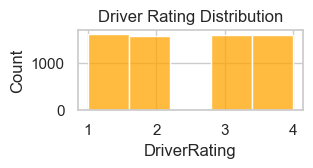

In [50]:
# 5. Driver Rating Distribution
plt.subplot(4, 2, 5)
sns.histplot(data=df_cleaned, x='DriverRating', bins=5, kde=False, color='orange')
plt.title('Driver Rating Distribution')



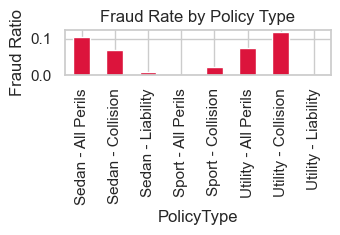

In [51]:
# 7. Fraud Rate by Policy Type
plt.subplot(4, 2, 7)
fraud_by_policy = df_cleaned.groupby(['PolicyType', 'FraudFound']).size().unstack().fillna(0)
fraud_by_policy_ratio = fraud_by_policy.div(fraud_by_policy.sum(axis=1), axis=0)
fraud_by_policy_ratio['Yes'].plot(kind='bar', color='crimson')
plt.title('Fraud Rate by Policy Type')
plt.ylabel('Fraud Ratio')

plt.tight_layout()
plt.show()

In [52]:
# ✅ 3. Preprocess & Model for Fraud Detection


In [53]:
# Copy and encode categorical variables
df_model = df_cleaned.copy()
label_encoders = {}

In [54]:
for col in df_model.select_dtypes(include='object'):
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [55]:
#Split features and target
X = df_model.drop("FraudFound", axis=1)
y = df_model["FraudFound"]

In [56]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
# Predict and evaluate
y_pred = model.predict(X_test)


In [59]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1798
           1       0.00      0.00      0.00       100

    accuracy                           0.95      1898
   macro avg       0.47      0.50      0.49      1898
weighted avg       0.90      0.95      0.92      1898

Confusion Matrix:
 [[1798    0]
 [ 100    0]]


C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
# Extract fraud records
fraud_detected = X_test[y_pred == 1]
print("Detected Fraud Records:", fraud_detected.shape)


Detected Fraud Records: (0, 32)


In [61]:
# ✅ 4. (Optional) Claim Prediction & CLV Calculation


In [66]:
def convert_claims(value):
    if pd.isna(value):
        return 0
    elif isinstance(value, str) and "to" in value:
        start, end = value.split(" to ")
        return (int(start) + int(end)) // 2  # Take average
    else:
        try:
            return int(value)
        except:
            return 0

df_cleaned['PastNumberOfClaims_Clean'] = df_cleaned['PastNumberOfClaims'].apply(convert_claims)


C:\Users\FINRISE\AppData\Local\Temp\ipykernel_9528\3844508064.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PastNumberOfClaims_Clean'] = df_cleaned['PastNumberOfClaims'].apply(convert_claims)


In [67]:
price_mapping = {
    'less than 20000': 10000,
    '20000 to 29000': 25000,
    '30000 to 39000': 35000,
    '40000 to 59000': 50000,
    '60000 to 69000': 65000,
    'more than 69000': 75000
}

df_cleaned['VehiclePrice_Numeric'] = df_cleaned['VehiclePrice'].map(price_mapping)


C:\Users\FINRISE\AppData\Local\Temp\ipykernel_9528\3999873417.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['VehiclePrice_Numeric'] = df_cleaned['VehiclePrice'].map(price_mapping)


In [68]:
df_cleaned['CLV'] = df_cleaned['PastNumberOfClaims_Clean'] * df_cleaned['VehiclePrice_Numeric']


C:\Users\FINRISE\AppData\Local\Temp\ipykernel_9528\1092657965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CLV'] = df_cleaned['PastNumberOfClaims_Clean'] * df_cleaned['VehiclePrice_Numeric']
